In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [197]:
#Number 1
carseats = pd.read_csv('../Data/Data/Carseats.csv', usecols=[6,10,11])
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Price    400 non-null int64
Urban    400 non-null object
US       400 non-null object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


(100,)


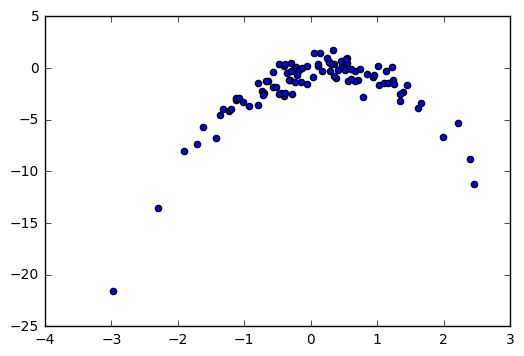

The plot shows a curve opening down


In [198]:
#Number 6 Chapter 5 Problem 8
from sklearn.linear_model import LogisticRegression
np.random.seed(10)
y = np.random.normal(size = 100)
#print(np.shape(y))
x = np.random.normal(size = 100)
#print(x)
y = x - 2*x**2 + np.random.normal(size = 100)
print(np.shape(y))
plt.scatter(x,y)
plt.show()
print("The plot shows a curve opening down")

In [199]:
def func1(x, b0, b1, c):
    return b0 + b1*x + c
def func2(x, b0, b1, b2, c):
    return b0 + b1*x + b2*x**2 + c
def func3(x, b0, b1, b2, b3, c):
    return b0 + b1*x + b2*x**2 + b3*x**3 + c
def func4(x, b0, b1, b2, b3, b4, c):
    return b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 +c

In [200]:
import scipy.optimize as optimization
z = np.zeros(100)
popt1, pcov1 = optimization.curve_fit(func1, x, y)
popt2, pcov2 = optimization.curve_fit(func2, x, y)
popt3, pcov3 = optimization.curve_fit(func3, x, y)
popt4, pcov4 = optimization.curve_fit(func4, x, y)


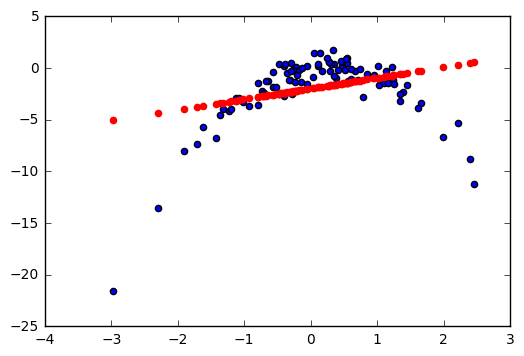

In [201]:
y1 = func1(x, popt1[0], popt1[1], popt1[2])
plt.scatter(x,y)
plt.scatter(x,y1,color='red')
plt.show()

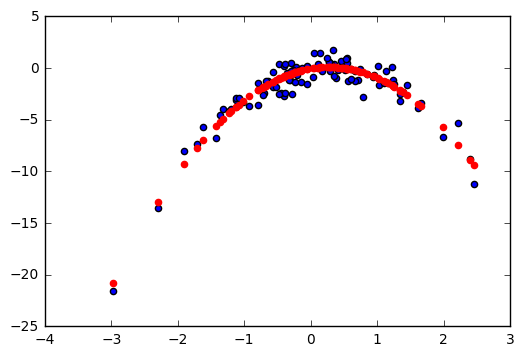

In [202]:
y2 = popt2[0] + popt2[1]*x + popt2[2]*x**2 + popt2[3]
plt.scatter(x,y)
plt.scatter(x,y2,color='red')
plt.show()

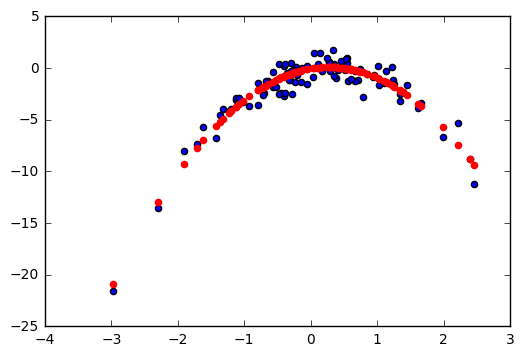

In [203]:
y3 = popt3[0] + popt3[1]*x + popt3[2]*x**2 + popt3[3]*x**3 + popt3[4]
plt.scatter(x,y)
plt.scatter(x,y3,color='red')
plt.show()

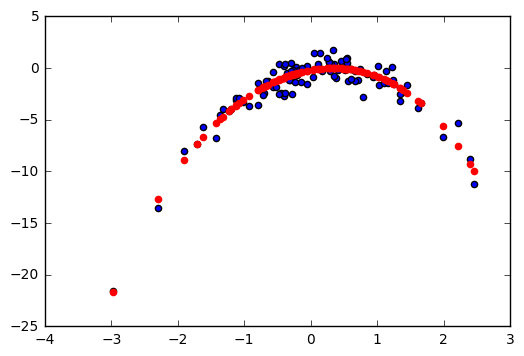

In [204]:
y4 = popt4[0] + popt4[1]*x + popt4[2]*x**2 + popt4[3]*x**3 + popt4[4]*x**4 + popt4[5]
plt.scatter(x,y)
plt.scatter(x,y4,color='red')
plt.show()

In [220]:
from sklearn import model_selection
loo = model_selection.LeaveOneOut()
np.random.seed(1)
diff1 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func1, x_train, y_train)
    diff1 += (y_test - func1(x_test, weights[0], weights[1], weights[2]))**2
    #print(y_test - func1(x_test, popt1[0], popt1[1], popt1[2]))
diff1 /= 100
print(diff1)
    #print(x_train, x_test

[ 10.831262]


In [206]:
diff2 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func2, x_train, y_train)
    diff2 += (y_test - func2(x_test, weights[0], weights[1], weights[2], weights[3]))**2
    
diff2 /= 100
print(diff2)

[ 0.89985728]


In [207]:
diff3 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func3, x_train, y_train)
    diff3 += (y_test - func3(x_test, weights[0], weights[1], weights[2], weights[3], weights[4]))**2
    
diff3 /= 100
print(diff3)

[ 0.98007963]


In [208]:
diff4 = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    weights, throw_away = optimization.curve_fit(func4, x_train, y_train)
    diff4 += (y_test - func4(x_test, weights[0], weights[1], weights[2], weights[3], weights[4], weights[5]))**2
    
diff4 /= 100
print(diff4)

[ 0.90534863]


### Problem 6: Problem 9 from Chapter 6

In [235]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.decomposition import PCA

In [228]:
college = pd.read_csv("../Data/Data/College.csv")
college = college.replace(['Yes', 'No'], [1,0])
college.shape

(777, 19)

In [229]:
#Part A
features = ['Private', 'Accept', 'Enroll', 'Top10perc', 'F.Undergrad',
            'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal',
            'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
X_train, X_test, Y_train, Y_test = train_test_split(college[features], college['Apps'], test_size=0.33, random_state=42)

In [230]:
#Part B
lms = linear_model.LinearRegression()
lms.fit(X_train, Y_train)

score = mean_squared_error(Y_test, lms.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1793667.364768269


In [231]:
#Part C
ridge_reg = linear_model.RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
ridge_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1790790.781051739


In [232]:
lasso_reg = linear_model.LassoCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
lasso_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, lasso_reg.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1793660.783999553


In [233]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X_train)

# Show how much variance is explained
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  49.94,   87.47,   95.73,   97.5 ,   98.71,   99.45,   99.92,
         99.98,  100.01,  100.01,  100.01,  100.01,  100.01,  100.01,
        100.01,  100.01])

In [236]:
from sklearn.cross_decomposition import PLSRegression
params = {'n_components':[2, 3, 4, 5, 7, 10]}

pls = PLSRegression()
pls_reg = GridSearchCV(pls, params, scoring='neg_mean_squared_error')
pls_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, pls_reg.predict(X_test))
print("Error on test data: {}".format(score))
print("Value of M selected by CV: {}".format(pls_reg.best_params_['n_components']))

Error on test data: 10911489.731786953
Value of M selected by CV: 10
